In [24]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Problem 6

Let $A$ be the matrix
$$A=
\begin{bmatrix}
1 & - 1 & 1\\
-1 & 0 & -1\\
1 & -1 & -1
\end{bmatrix}$$
By Cayley–Hamilton theorem, $A$ satisfies its own characteristic polynomial $p(\lambda)$. </br>
Let $\lambda_1,\lambda_2,\lambda_3$ be its eigenvalue, then 
$$p(\lambda)=(\lambda-\lambda_1)(\lambda-\lambda_2)(\lambda-\lambda_3)$$
By comparing coefficients, we see that
$$
\begin{cases}
a = -(\lambda_1+\lambda_2+\lambda_3)\\
b = \lambda_1\lambda_2+\lambda_2\lambda_3+\lambda_3\lambda_1\\
c = -\lambda_1\lambda_2\lambda_3
\end{cases}
$$

In [2]:
# Create the matrix A, 3X3 identity matrix, and zero matrix
A = np.matrix([[1, -1, 1], [-1, 0, -1], [1, -1, -1]])
A

matrix([[ 1, -1,  1],
        [-1,  0, -1],
        [ 1, -1, -1]])

In [3]:
# Compute the eigenvalues of A
eigenvalues = np.linalg.eigvals(A)

In [4]:
eigenvalues

array([ 2.21431974, -0.53918887, -1.67513087])

In [5]:
# Compute the solutions a, b, c
a = -(eigenvalues[0] + eigenvalues[1] + eigenvalues[2])
b = eigenvalues[0] * eigenvalues[1] + eigenvalues[1] * eigenvalues[2] + eigenvalues[2] * eigenvalues[0]
c = -eigenvalues[0] * eigenvalues[1] * eigenvalues[2]
print(f"The solutions are a = {a}, b = {b}, c = {c}")

The solutions are a = 1.9984014443252818e-15, b = -3.999999999999996, c = -1.9999999999999998


In [6]:
# Testing whether computed a, b, c are indeed solutions
I = np.identity(3)
print(np.linalg.matrix_power(A, 3) + a * np.linalg.matrix_power(A, 2) + b * A + c * I)

[[ 1.04360964e-14 -7.54951657e-15  5.77315973e-15]
 [-7.54951657e-15  4.21884749e-15 -3.99680289e-15]
 [ 5.77315973e-15 -3.99680289e-15  1.99840144e-15]]


Hence, the computed solution is given by $a=1.9984014443252818e-15, b=-3.999999999999996, c=-1.9999999999999998$. </br>
Plugging in these into the equation indeed gives us the zero matrix. </br>
Once rounded, the solutions are $a=0, b=-4, c=-2$, which is the true value if calculated by hand.

## Problem 7

### Problem (1), (2)

In the following problem, due to computational issues, we restrict matrix size to 100, 500, and 1000

In [8]:
# M_W takes in matrix size as argument and returns a random matrix that's scaled by sqrt(n)
def MW(n):
    diagonal = np.random.normal(loc=0, scale=np.sqrt(2), size=n)
    upper_triangular = np.random.normal(size=(n, n))
    upper_triangular = np.triu(upper_triangular, k=1)
    W = upper_triangular + upper_triangular.T
    np.fill_diagonal(W, diagonal)
    return W / n ** 0.5
MW(3)

array([[ 0.84697741, -0.64765219,  0.47926734],
       [-0.64765219,  0.24978478, -1.16776298],
       [ 0.47926734, -1.16776298,  0.21837789]])

In [9]:
# Define the Wigner semi-circle density
def wigner(x):
    return np.sqrt(4 - x ** 2) / (2 * math.pi)

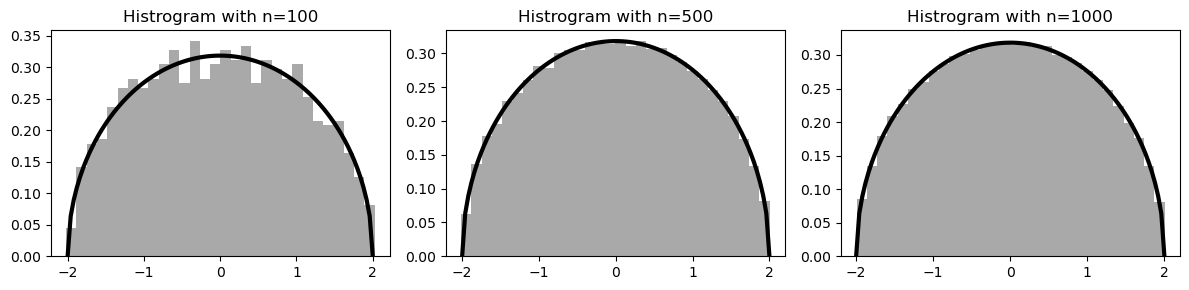

In [11]:
# Plot a histogram of the eigenvalues of M_W with n=100, 500, 1000, along with the Wigner semicircle density
def plot_MW():
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    matrix_size = [100, 500, 1000]
    num_samples = 10
    for i in range(3):
        size = matrix_size[i]
        eigenvalues = []
        for j in range(num_samples):
            mw = MW(size)
            for e in np.linalg.eigvals(mw):
                eigenvalues.append(e)
        x = np.linspace(-2, 2, 100)
        y = wigner(x)
        axes[i].plot(x, y, color="black", linewidth=3.0)
        axes[i].hist(eigenvalues, bins=30, density=True, color="#A9A9A9")
        axes[i].set_title(f"Histrogram with n={size}")
    plt.tight_layout()
    plt.show()   
plot_MW()           

Note that the distribution of the eigenvalues follows the same density as the Wiegner semi-circle distribution.

### Problem (3)

The matrix 
$$A = \frac{1}{n}AA^T$$
Has size $m\times m$ and represent the covariance matrix of the $m$ features.

### Problem (4), (5)

In [25]:
# M_A takes in matrix size as argument and returns a random matrix that's scaled by 1/n
def MA(m, n):
    A = np.random.randn(m, n)
    M_A = np.dot(A, A.T)
    return M_A / n 
MA(3, 4)

array([[ 2.02943112,  0.03099195, -0.98938068],
       [ 0.03099195,  1.06486093,  0.19160984],
       [-0.98938068,  0.19160984,  1.35968015]])

In [26]:
def marchenko(x, m, n):
    a = (1 - np.sqrt(m / n)) ** 2
    b = (1 + np.sqrt(m / n)) ** 2
    numerator = np.sqrt((b-x) * (x-a)) 
    denominator = 2 * math.pi * x
    return numerator / denominator

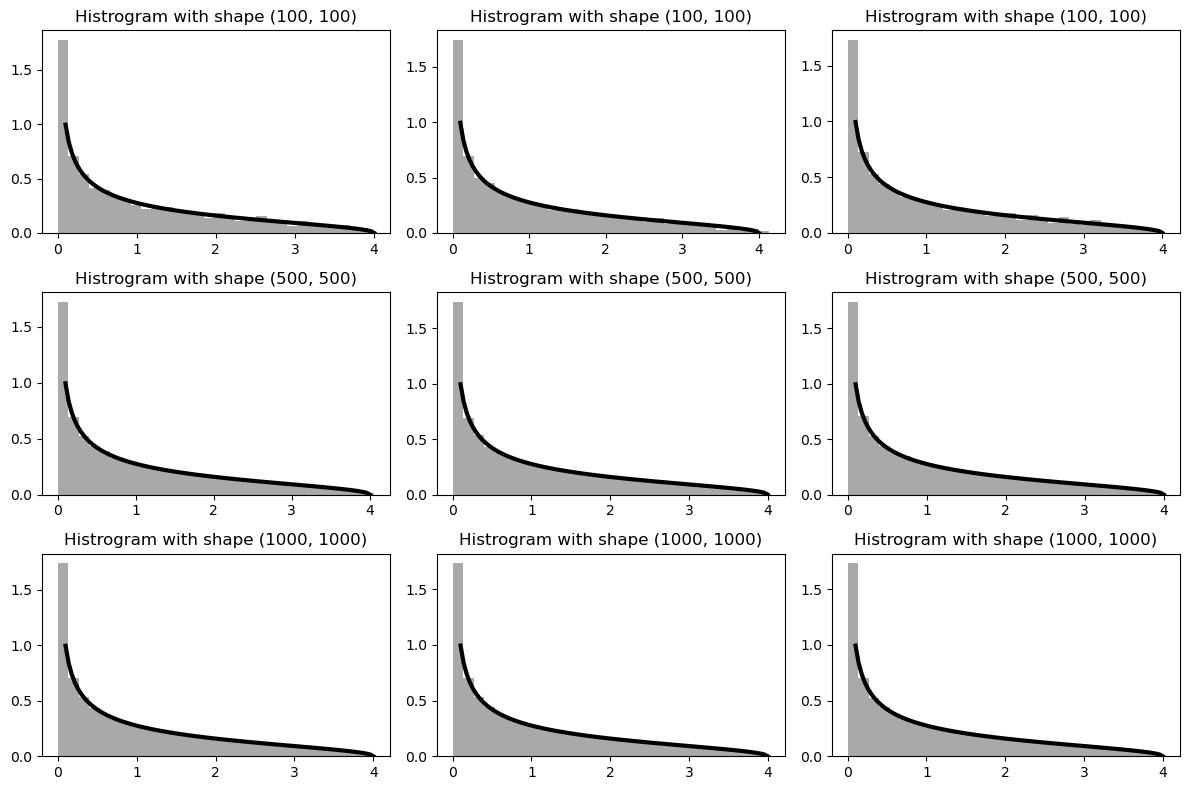

In [28]:
# Plot a histogram of the eigenvalues of M_A with n=100, 500, 1000, along with the Marchenko-Pastur density
def plot_MA():
    fig, axes = plt.subplots(3, 3, figsize=(12, 8))
    m = [100, 500, 1000]
    n = [100, 500, 1000]
    num_samples = 10
    for i in range(3):
        for j in range(3):
            m_size, n_size = m[i], n[i]
            eigenvalues = []
            for k in range(num_samples):
                ma = MA(m_size, n_size)
                for e in np.linalg.eigvals(ma):
                    eigenvalues.append(e)
            x = np.linspace(0.1, 4, 100)
            y = marchenko(x, m_size, n_size)
            axes[i, j].plot(x, y, color="black", linewidth=3.0)
            axes[i, j].hist(eigenvalues, bins=30, density=True, color="#A9A9A9")
            axes[i, j].set_title(f"Histrogram with shape {(m_size, n_size)}")  
    plt.tight_layout()
    plt.show()   
plot_MA()       

Note that the distribution of the eigenvalues follows the same density as the Marchenko-Pastur density

## Exporting file to pdf

In [9]:
import plotly.express as px
!pip install Pyppeteer
!pyppeteer-install

     |████████████████████████████████| 83 kB 1.5 MB/s eta 0:00:011
You should consider upgrading via the '/Users/raymondtsao/anaconda3/bin/python -m pip install --upgrade pip' command.
[INFO] Starting Chromium download.
100%|██████████████████████████████████████| 86.8M/86.8M [00:04<00:00, 18.3Mb/s]
[INFO] Beginning extraction
[INFO] Chromium extracted to: /Users/raymondtsao/Library/Application Support/pyppeteer/local-chromium/588429
